In [43]:
from Bio import SeqIO

for seq_record in SeqIO.parse("/home/egebircan/Desktop/P08100.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

sp|P08100|OPSD_HUMAN
Seq('MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPI...APA', SingleLetterAlphabet())
348


In [44]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from itertools import groupby
import collections

aaDict = {}

all_aas = collections.defaultdict(int)
for rec in SeqIO.parse("/home/egebircan/Desktop/P08100.fasta", "fasta"):
    x = ProteinAnalysis(str(rec.seq))
    aaDict = x.count_amino_acids()
    #print(x.count_amino_acids())

aaDict

{'A': 32,
 'C': 10,
 'D': 4,
 'E': 16,
 'F': 30,
 'G': 22,
 'H': 5,
 'I': 24,
 'K': 11,
 'L': 29,
 'M': 15,
 'N': 16,
 'P': 20,
 'Q': 12,
 'R': 7,
 'S': 17,
 'T': 24,
 'V': 30,
 'W': 5,
 'Y': 19}

{"A": 32, "V": 30, "F": 30, "L": 29, "T": 24, "I": 24, "G": 22, "P": 20, "Y": 19, "S": 17, "N": 16, "E": 16, "M": 15, "Q": 12, "K": 11, "C": 10, "R": 7, "W": 5, "H": 5, "D": 4} 

{"A": "9.20%", "V": "8.62%", "F": "8.62%", "L": "8.33%", "T": "6.90%", "I": "6.90%", "G": "6.32%", "P": "5.75%", "Y": "5.46%", "S": "4.89%", "N": "4.60%", "E": "4.60%", "M": "4.31%", "Q": "3.45%", "K": "3.16%", "C": "2.87%", "R": "2.01%", "W": "1.44%", "H": "1.44%", "D": "1.15%"}


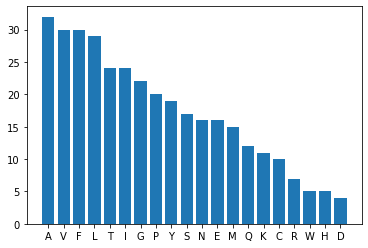

In [45]:
import matplotlib.pylab as plt
from collections import OrderedDict
from operator import itemgetter
import numpy as np
import json

orderedAaDict = OrderedDict(reversed(sorted(aaDict.items(), key=itemgetter(1))))

def getPercentage(v):
  return '{0:.2f}%'.format((v / 348 * 100))

finalDict = {k: getPercentage(v) for k, v in orderedAaDict.items()}

plt.bar(range(len(orderedAaDict)), list(orderedAaDict.values()), align='center')
plt.xticks(range(len(orderedAaDict)), list(orderedAaDict.keys()))

print(json.dumps(orderedAaDict), "\n")
print(json.dumps(finalDict))

np.savetxt('/home/egebircan/Desktop/log.txt', [json.dumps(finalDict)], fmt='%s')

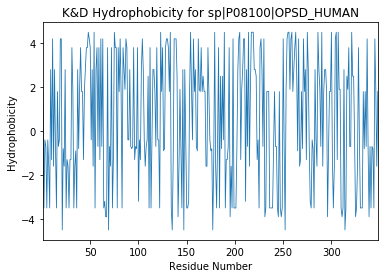

In [46]:
from pylab import *
from Bio import SeqIO

fh = open("/home/egebircan/Desktop/P08100.fasta")

for record in SeqIO.parse(fh, "fasta"):
 id = record.id
 seq = record.seq
 num_residues = len(seq)

fh.close()

kd = { 'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }

values = []

for residue in seq:
 values.append(kd[residue])

x_data = range(1, num_residues+1)

plot(x_data, values, linewidth=0.8)

axis(xmin = 1, xmax = num_residues)

xlabel("Residue Number")
ylabel("Hydrophobicity")
title("K&D Hydrophobicity for " + id)

show()